# Grid
## Change the adapter

In [1]:
import gym
import gym_grid

from lcs import Perception
from lcs.agents import EnvironmentAdapter
from lcs.metrics import population_metrics
from lcs.agents.acs2 import ACS2, Configuration

import pandas as pd

import matplotlib.pyplot as plt

env = gym.make('grid-40-v0')
s = env.reset()

In [2]:
class Adapter(EnvironmentAdapter):

    @classmethod
    def to_genotype(cls, phenotype):
        # Represent state as a single unicode character
        return list(map(lambda x: chr(int(x) + 65), phenotype))
    
def metrics(agent, env):
    pop = agent.get_population()

    metrics = {
        'reliable': len([cl for cl in pop if cl.is_reliable()]),
    }

    metrics.update(population_metrics(pop, env))
    return metrics

acs2_cfg = Configuration(2, 4,
                         environment_adapter=Adapter,
                         user_metrics_collector_fcn=metrics,
                         epsilon=0.9,
                         do_ga=True,
                         metrics_trial_frequency=1)

acs2_agent = ACS2(cfg=acs2_cfg)

In [3]:
ex_pop, ex_met = acs2_agent.explore(env, 5000, decay=False)

In [4]:
rel = [cl for cl in ex_pop if cl.is_reliable()]
sorted(rel, key=lambda cl: -cl.fitness)[:20]

[#g 2 #h               (empty)               q: 1.0   r: 89.88  ir: 0.0    f: 89.88  exp: 80776 tga: 8738847 talp: 8738847 tav: 27.9   num: 20,
 #i 3 #h               (empty)               q: 1.0   r: 89.05  ir: 0.0    f: 89.05  exp: 88342 tga: 8738638 talp: 8738709 tav: 17.7   num: 20,
 #h 2 #i               (empty)               q: 1.0   r: 88.94  ir: 0.8431 f: 88.94  exp: 89492 tga: 8738850 talp: 8738850 tav: 23.9   num: 20,
 #h 3 #g               (empty)               q: 1.0   r: 88.7   ir: 0.0    f: 88.7   exp: 79608 tga: 8738740 talp: 8738740 tav: 23.8   num: 20,
 #i 2 ##               (empty)               q: 1.0   r: 87.14  ir: 0.0    f: 87.14  exp: 64567 tga: 8738637 talp: 8738686 tav: 35.4   num: 20,
 #] 2 #^               (empty)               q: 1.0   r: 83.08  ir: 0.0    f: 83.08  exp: 47580 tga: 8740146 talp: 8740146 tav: 23.7   num: 20,
 #^ 3 #]               (empty)               q: 1.0   r: 82.94  ir: 0.0    f: 82.94  exp: 46830 tga: 8740132 talp: 8740153 tav: 23.9   n

In [5]:
def parse_metrics(metrics):
    lst = [[d['trial'], d['population'], d['reliable'], d['steps_in_trial']] for d in metrics]

    df = pd.DataFrame(lst, columns=['trial', 'population', 'reliable', 'steps_in_trial'])
    df = df.set_index('trial')

    return df

In [6]:
met_df = parse_metrics(ex_met)

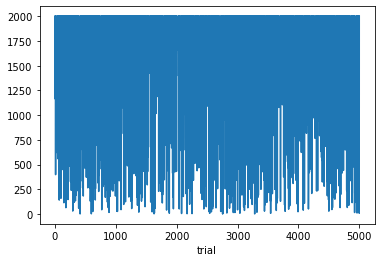

In [7]:
met_df['steps_in_trial'].plot()
plt.show()

## exploit

In [8]:
agent2 = ACS2(cfg=acs2_cfg, population=ex_pop)
expl_pop, expl_met = agent2.exploit(env, 50)

In [9]:
expl_met_df = parse_metrics(expl_met)

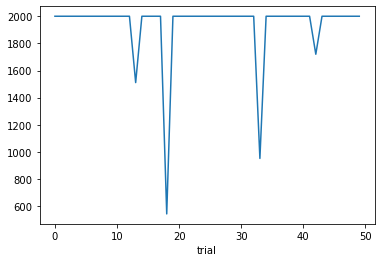

In [10]:
expl_met_df['steps_in_trial'].plot()
plt.show()